In [1]:
library(ggplot2)


In [2]:

# 1. Load Dataset
df <- read.csv("D:/train.csv")



Dataset loaded successfully.
Total rows after cleaning: 1058 


,Age,MonthlyIncome
,<int>,<int>
1,41,5993
2,49,5130
3,37,2090
4,33,2909
5,27,3468
6,32,3068


In [ ]:
# 2 Select relevant columns and remove missing values
df <- na.omit(df[, c("Age", "MonthlyIncome")])

cat("Dataset loaded successfully.\n")
cat("Total rows after cleaning:", nrow(df), "\n")
head(df)

In [3]:
# 3  Descriptive Statistics
cat("\nDescriptive Statistics:\n")
summary(df)



Descriptive Statistics:


      Age        MonthlyIncome  
 Min.   :18.00   Min.   : 1009  
 1st Qu.:30.00   1st Qu.: 2900  
 Median :36.00   Median : 4904  
 Mean   :37.06   Mean   : 6626  
 3rd Qu.:43.00   3rd Qu.: 8736  
 Max.   :60.00   Max.   :19999  

In [4]:
# 4 Pearson Correlation Test
cat("\nRunning Pearson Correlation...\n")

cor_test <- cor.test(df$Age, df$MonthlyIncome, method = "pearson")

cat("\nCorrelation Results:\n")
print(cor_test)

# Decision based on p-value
if (cor_test$p.value < 0.05) {
  cat("\nConclusion: p < 0.05 → Statistically Significant\n")
  cat("We REJECT the Null Hypothesis.\n")
} else {
  cat("\nConclusion: p >= 0.05 → Not Significant\n")
  cat("We FAIL TO REJECT the Null Hypothesis.\n")
}


Running Pearson Correlation...

Correlation Results:

	Pearson's product-moment correlation

data:  df$Age and df$MonthlyIncome
t = 18.632, df = 1056, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4506317 0.5414306
sample estimates:
      cor 
0.4973921 


Conclusion: p < 0.05 → Statistically Significant
We REJECT the Null Hypothesis.


`geom_smooth()` using formula = 'y ~ x'


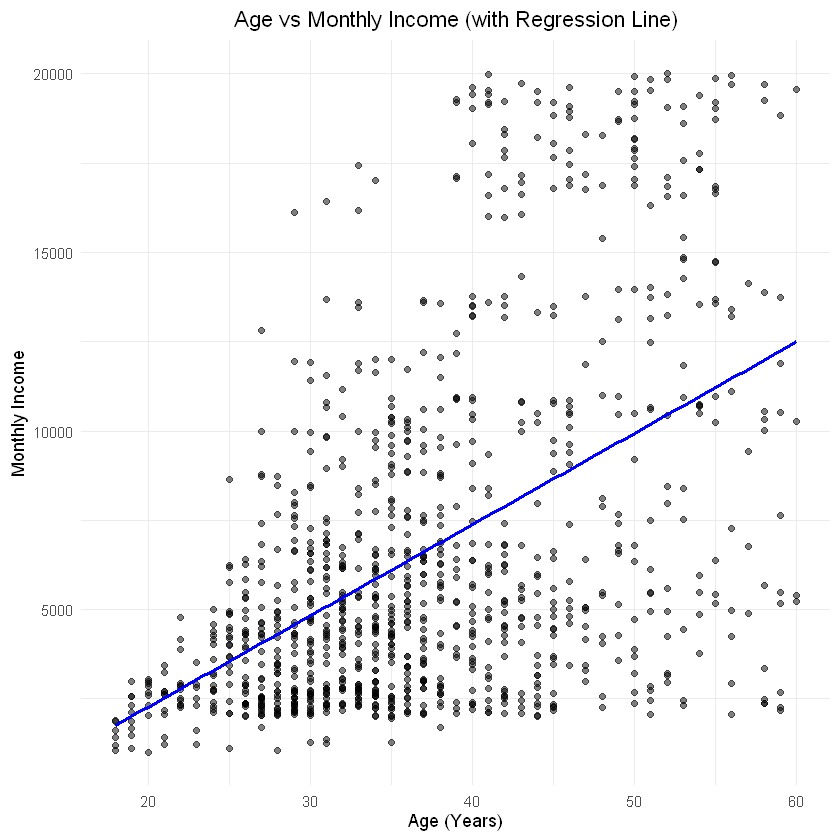

In [5]:
# 5 Scatter Plot with Regression Line

# Load ggplot2
library(ggplot2)

# Scatter plot with regression line
ggplot(df, aes(x = Age, y = MonthlyIncome)) +
  geom_point(alpha = 0.5) +                     
  geom_smooth(method = "lm", se = FALSE, color = "blue") + 
  labs(
    title = "Age vs Monthly Income (with Regression Line)",
    x = "Age (Years)",
    y = "Monthly Income"
  ) +
  theme_minimal() +                             
  theme(
    plot.title = element_text(hjust = 0.5)     
  )


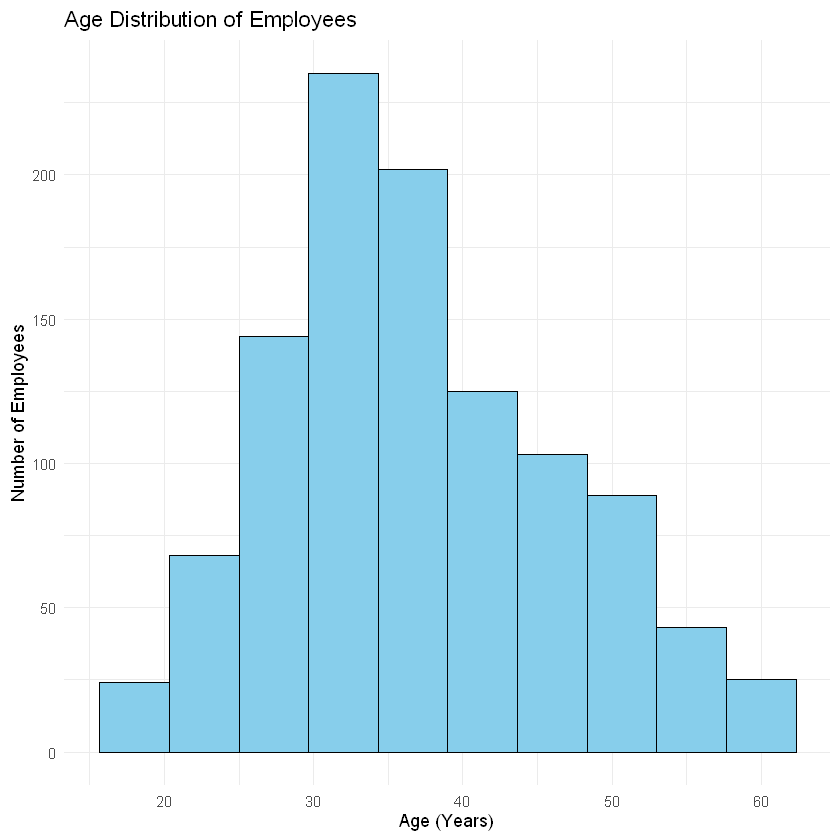

In [6]:
# 6  Histogram: Age


ggplot(df, aes(x = Age)) +
  geom_histogram(bins = 10, fill = "skyblue", color = "black") +
  labs(title = "Age Distribution of Employees",
       x = "Age (Years)",
       y = "Number of Employees") +
  theme_minimal()

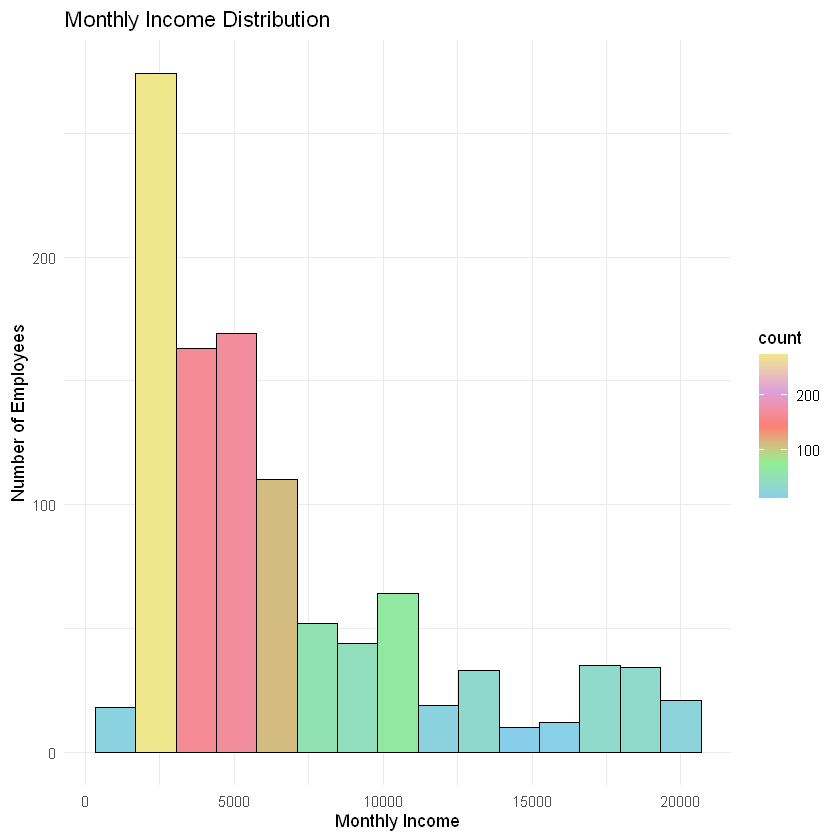

In [8]:
# 7  Histogram: Monthly Income


ggplot(df, aes(x = MonthlyIncome)) +
  geom_histogram(
    bins = 15, 
    aes(fill = ..count..),  # fill by bin count
    color = "black"
  ) +
  scale_fill_gradientn(colors = c("skyblue", "lightgreen", "salmon", "plum", "khaki")) +
  labs(title = "Monthly Income Distribution",
       x = "Monthly Income",
       y = "Number of Employees") +
  theme_minimal()
